In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 원-핫 인코딩
+ 인덱스 위치만 1이고 나머지는 모두 0을 갖는 길이 K의 벡터

In [2]:
y = np.arange(10) # integer label
print("y=", y)

y1 = tf.keras.utils.to_categorical(y) # keras one-hot label
print("y1=", y1)

y= [0 1 2 3 4 5 6 7 8 9]
y1= [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 카테고리 교차 엔트로피 오차
##### 엔트로피
+ 사건 A를 반복 실행하였을때 얻을 수 있는 "평균정보량", "정보량의 기대값"
+ 어떤 상태에서의 불확실성
+ 확률의 역수에 로그값을 취함 (h(x) = -log p(x))

##### 교차 엔트로피
+ 교차 엔트로피는 머신러닝 분류 모델의 손실함수 중의 하나
+ 모델이 예측한 확률 분포와 실제 레이블의 확률 분포 간의 차이를 측정하는 손실함수
+ t : 실제 레이블 (0 또는 1)
+ y : 모델이 예측한 확률 (0~1 사이의 값)

##### 교차 엔트로피 오차
+ 특정 클래스에 속할 정보량을 이용
+ 정보량이 0에 가까워져 발생확률이 1에 가깝게 만드는 것이 목적

In [3]:
CCE = tf.keras.losses.CategoricalCrossentropy()
t= np.array([[1,   0,   0,   0],   #t[0] 출력층의 정답 label
             [0,   1,   0,   0],   #t[1]
             [0,   0,   1,   0],   #t[2]
             [0,   0,   0,   1]])  #t[3]

y =np.array([[0.4, 0.3, 0.2, 0.1], #y[0] - 예측값
             [0.1, 0.3, 0.2, 0.4]])#y[1]
#1
print("CCE(t[i], y[0])")
print("CCE(t[0], y[0])=", CCE(t[0], y[0]).numpy() )
print("CCE(t[1], y[0])=", CCE(t[1], y[0]).numpy() )
print("CCE(t[2], y[0])=", CCE(t[2], y[0]).numpy() )
print("CCE(t[3], y[0])=", CCE(t[3], y[0]).numpy() )

#2
print("CCE(t[i], y[1])")
print("CCE(t[0], y[1])=", CCE(t[0], y[1]).numpy() )
print("CCE(t[1], y[1])=", CCE(t[1], y[1]).numpy() )
print("CCE(t[2], y[1])=", CCE(t[2], y[1]).numpy() )
print("CCE(t[3], y[1])=", CCE(t[3], y[1]).numpy() )

#3
print("CCE(np.vstack((t[1], t[1])), y)=",
       CCE(np.vstack((t[1], t[1])), y).numpy() )


CCE(t[i], y[0])
CCE(t[0], y[0])= 0.916290731874155
CCE(t[1], y[0])= 1.203972804325936
CCE(t[2], y[0])= 1.6094379124341003
CCE(t[3], y[0])= 2.3025850929940455
CCE(t[i], y[1])
CCE(t[0], y[1])= 2.3025850929940455
CCE(t[1], y[1])= 1.203972804325936
CCE(t[2], y[1])= 1.6094379124341003
CCE(t[3], y[1])= 0.916290731874155
CCE(np.vstack((t[1], t[1])), y)= 1.203972804325936


In [4]:
SCE = tf.keras.losses.SparseCategoricalCrossentropy()

t = tf.convert_to_tensor([0, 1, 2, 3])
y =tf.convert_to_tensor([[0.4, 0.3, 0.2, 0.1], #y[0]
                         [0.1, 0.3, 0.2, 0.4]])#y[1]

#1
print("SCE(t[i], y[0])")
print("SCE(t[0], y[0])=", SCE(t[0], y[0]).numpy() )
print("SCE(t[1], y[0])=", SCE(t[1], y[0]).numpy() )
print("SCE(t[2], y[0])=", SCE(t[2], y[0]).numpy() )
print("SCE(t[3], y[0])=", SCE(t[3], y[0]).numpy() )

#2
print("SCE(t[i], y[1])")
print("SCE(t[0], y[1])=", SCE(t[0], y[1]).numpy() )
print("SCE(t[1], y[1])=", SCE(t[1], y[1]).numpy() )
print("SCE(t[2], y[1])=", SCE(t[2], y[1]).numpy() )
print("SCE(t[3], y[1])=", SCE(t[3], y[1]).numpy() )

#3
print("SCE(tf.stack((t[1], t[1])), y)=",
       SCE(tf.stack((t[1], t[1])), y).numpy() )

SCE(t[i], y[0])
SCE(t[0], y[0])= 0.91629076
SCE(t[1], y[0])= 1.2039728
SCE(t[2], y[0])= 1.609438
SCE(t[3], y[0])= 2.3025851
SCE(t[i], y[1])
SCE(t[0], y[1])= 2.3025851
SCE(t[1], y[1])= 1.2039728
SCE(t[2], y[1])= 1.609438
SCE(t[3], y[1])= 0.91629076
SCE(tf.stack((t[1], t[1])), y)= 1.2039728


### 이진 교차 엔트로피

In [5]:
BCE = tf.keras.losses.BinaryCrossentropy()
t= np.array([[1,   1,   0,   0],   #t[0]
             [0,   1,   1,   0],   #t[1]
             [0,   0,   1,   1],   #t[2]
             [0,   1,   0,   1]])  #t[3]

y =np.array([[0.4, 0.3, 0.2, 0.1], #y[0]
             [0.1, 0.3, 0.2, 0.4]])#y[1]
#1
print("BCE(t[i], y[0])")
print("BCE(t[0], y[0])=", BCE(t[0], y[0]).numpy() )
print("BCE(t[1], y[0])=", BCE(t[1], y[0]).numpy() )
print("BCE(t[2], y[0])=", BCE(t[2], y[0]).numpy() )
print("BCE(t[3], y[0])=", BCE(t[3], y[0]).numpy() )

#2
print("BCE(t[i], y[1])")
print("BCE(t[0], y[1])=", BCE(t[0], y[1]).numpy() )
print("BCE(t[1], y[1])=", BCE(t[1], y[1]).numpy() )
print("BCE(t[2], y[1])=", BCE(t[2], y[1]).numpy() )
print("BCE(t[3], y[1])=", BCE(t[3], y[1]).numpy() )

#3
print("BCE(np.vstack((t[0], t[0])), y)=",
       BCE(np.vstack((t[0], t[0])), y).numpy() )

BCE(t[i], y[0])
BCE(t[0], y[0])= 0.6121916959319459
BCE(t[1], y[0])= 0.8573989362682357
BCE(t[2], y[0])= 1.194880440902427
BCE(t[3], y[0])= 1.0601313618501897
BCE(t[i], y[1])
BCE(t[0], y[1])= 1.0601313618501897
BCE(t[1], y[1])= 0.8573989362682357
BCE(t[2], y[1])= 0.7469407749841832
BCE(t[3], y[1])= 0.6121916959319459
BCE(np.vstack((t[0], t[0])), y)= 0.8361615288910678


### 활성화함수
+ linear : f(x) = x
+ sigmoid : f(x) = 1/(1+exp(-x))
+ tanh : f(x) = sinh(x) / cosh(x)
+ relu : f(x) = max(x) = 0 if x<0, x if x>=0
+ leakyrelu : f(x) = a*x if x<0, x if x>=0
+ softmax : 지수함수 사용, 입력 벡터 x를 확률로 변환하여 출력 (분류)

In [11]:
def sigmoid_function(x):
  return 1/(1+np.exp(-x))

def tanh_function(x):
  return np.tanh(x)

def relu_function(x):
  return np.where(x <= 0, 0, x)

def softmax(x):
    exp_x = np.exp(x)
    result = exp_x / np.sum(exp_x)
    return result

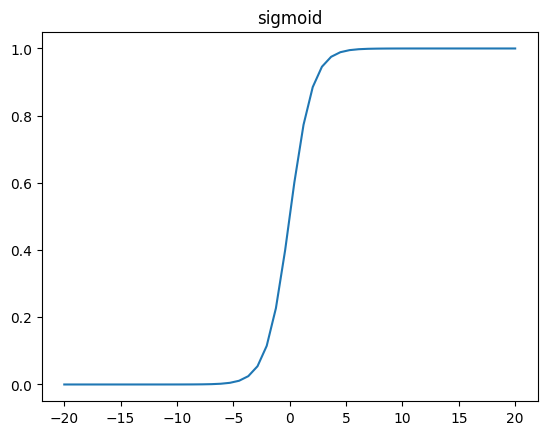

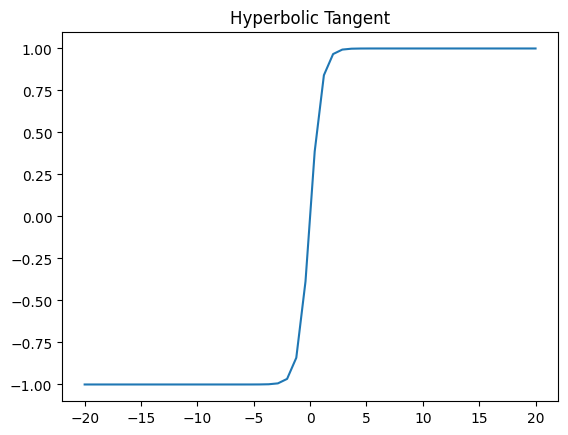

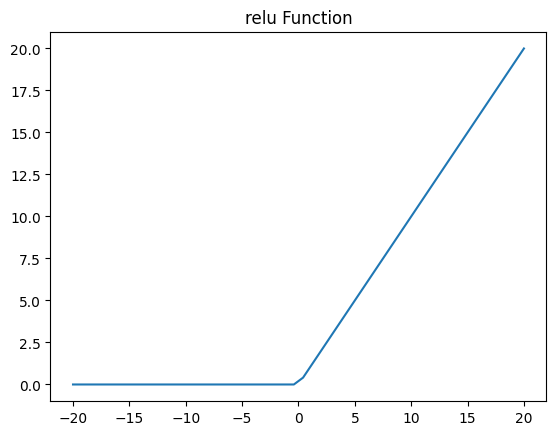

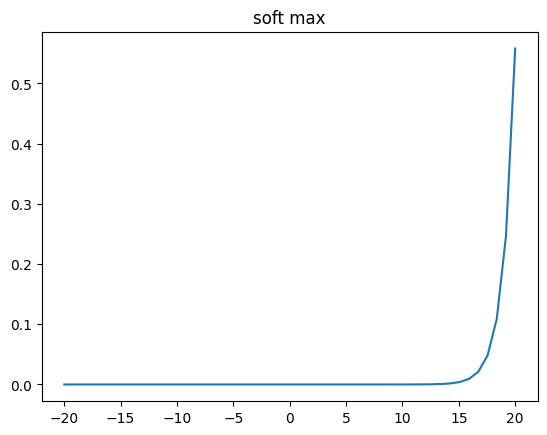

In [20]:
x = np.linspace(-20, 20)

sigmoid_y = sigmoid_function(x)
plt.plot(x, sigmoid_y)
plt.title('sigmoid')
plt.show()

tanh_y = tanh_function(x)
plt.plot(x, tanh_y)
plt.title('Hyperbolic Tangent')
plt.show()

relu_y = relu_function(x)
plt.plot(x, relu_y)
plt.title('relu Function')
plt.show()

soft_y = softmax(x)
plt.plot(x,soft_y)
plt.title('soft max')
plt.show()

### 분류 성능 평가

##### 정확도, 정밀도 재현율

In [26]:
#1
y_true = np.array([[1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1], #2
                   [1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1]]);#2

# binary: 1 above threshold=0.5, 0 below threshold= 0.5
y_pred = np.array([[0.3, 0.6, 0.1], #1
                   [0.6, 0.3, 0.1], #0
                   [0.1, 0.3, 0.6], #2
                   [0.3, 0.6, 0.1], #1
                   [0.1, 0.6, 0.3], #1
                   [0.3, 0.1, 0.6]]);#2

In [29]:
#2 각 행에 대하여 각각 정확도를 계산
accuracy1 =tf.keras.metrics.binary_accuracy(y_true, y_pred)
print("accuracy1=", accuracy1)

#2-1
m= tf.keras.metrics.BinaryAccuracy() #accuracy1 관계없음
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy1)
# print(m.total)
# m.count = accuracy1.shape[0]
# print(m.count)
accuracy2 = m.result() # m.total/m.count
print("m.total={}, m.count={}".format(m.total.numpy(), m.count.numpy()))
print("accuracy2=", accuracy2.numpy())

#m.total : y_true * y_pred 의 연산결과 true의 개수 (매칭되는 이진수의 개수)
#m.count : 전체 개수

accuracy1= tf.Tensor([0.33333334 0.33333334 1.         0.33333334 1.         1.        ], shape=(6,), dtype=float32)
m.total=12.0, m.count=18.0
accuracy2= 0.6666667


##### 정밀도, 재현율

In [30]:
#1
##y_true = np.array([0, 1, 2, 0, 1, 2])
##y_true = tf.keras.utils.to_categorical(y_true) # one-hot
y_true = np.array([[1, 0, 0], #argmax = 0
                   [0, 1, 0], #argmax = 1
                   [0, 0, 1], #argmax = 2
                   [1, 0, 0], #argmax = 0
                   [0, 1, 0], #argmax = 1
                   [0, 0, 1]]); #argmax = 2

y_pred = np.array([[0.3, 0.6, 0.1],  #1 가장큰 레코드 인덱스
                   [0.6, 0.3, 0.1],  #0
                   [0.1, 0.3, 0.6],  #2
                   [0.3, 0.6, 0.1],  #1
                   [0.1, 0.6, 0.3],  #1
                   [0.3, 0.1, 0.6]]);#2
num_class = y_true.shape[1] # 3

In [39]:
#2: C and TOP_k
#2-1: threshold, and C in # 3-1, #4-1, and #6 in [step1701]
y_true1 = np.argmax(y_true, axis=1).flatten()
y_pred1 = np.argmax(np.cast['int'](y_pred>0.5), axis=1).flatten()
C = tf.math.confusion_matrix(y_true1, y_pred1)
print("y_true1=",y_true1) # y_true1= [0 1 2 0 1 2]
print("y_pred1=",y_pred1) # y_pred1= [1 0 2 1 1 2]
print("confusion_matrix(C)=", C)

y_true1= [0 1 2 0 1 2]
y_pred1= [1 0 2 1 1 2]
confusion_matrix(C)= tf.Tensor(
[[0 2 0]
 [1 1 0]
 [0 0 2]], shape=(3, 3), dtype=int32)


In [40]:
#2-2: to find top-k index, in #3-2, #4-2
#argsort() : returns the indexes of a tensor that give its sorted order
#정렬 후 인덱스 반환
#axis =0 : row별, axis =1 : col별
k=2
indx = tf.argsort(y_pred, axis=1, direction='DESCENDING') #column
print('index = ', indx)
TOP_k = indx[:,:k] # slicing : coloum의 0 ~ k-1까지
print("TOP_k = ", TOP_k)

index =  tf.Tensor(
[[1 0 2]
 [0 1 2]
 [2 1 0]
 [1 0 2]
 [1 2 0]
 [2 0 1]], shape=(6, 3), dtype=int32)
TOP_k =  tf.Tensor(
[[1 0]
 [0 1]
 [2 1]
 [1 0]
 [1 2]
 [2 0]], shape=(6, 2), dtype=int32)


In [32]:
#3
print("In each class, precision!")
#3-1: binary(1 above threshold=0.5, 0 below threshold= 0.5)
for i in range(num_class):
    m = tf.keras.metrics.Precision(class_id = i) #i = 0,1,2
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fp = m.false_positives.numpy()
    p = m.result().numpy() # 정밀도
    print(" p_{} ={}, tp={}, fp= {}".format(i,p, tp, fp))

#3-2: the top-k classes with the highest predicted values
print("In each class, precision with top_k=", k)
for i in range(num_class):
    m = tf.keras.metrics.Precision(top_k=k, class_id = i)
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fp = m.false_positives.numpy()
    p = m.result().numpy()
    print(" p_{} ={}, tp={}, fp= {}".format(i,p, tp, fp))

In each class, precision!
 p_0 =0.0, tp=[0.], fp= [1.]
 p_1 =0.3333333432674408, tp=[1.], fp= [2.]
 p_2 =1.0, tp=[2.], fp= [0.]
In each class, precision with top_k= 2
 p_0 =0.5, tp=[2.], fp= [2.]
 p_1 =0.4000000059604645, tp=[2.], fp= [3.]
 p_2 =0.6666666865348816, tp=[2.], fp= [1.]


In [33]:
#4
print("In each class, recall!")
#4-1: binary(1 above threshold=0.5, 0 below threshold= 0.5)
for i in range(num_class):
    m = tf.keras.metrics.Recall(class_id = i)
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fn = m.false_negatives.numpy()
    r = m.result().numpy()
    print(" recall_{} ={}, tp={}, fn= {}".format(i,r, tp, fn))

#4-2: the top-k classes with the highest predicted values
print("In each class, recall with top_k=", k)
for i in range(num_class):
    m = tf.keras.metrics.Recall(top_k=k, class_id = i)
    m.update_state(y_true, y_pred)
    r = m.result().numpy()
    print(" recall_{} ={}, tp={}, fn= {}".format(i,r, tp, fn))

In each class, recall!
 recall_0 =0.0, tp=[0.], fn= [2.]
 recall_1 =0.5, tp=[1.], fn= [1.]
 recall_2 =1.0, tp=[2.], fn= [0.]
In each class, recall with top_k= 2
 recall_0 =1.0, tp=[2.], fn= [0.]
 recall_1 =1.0, tp=[2.], fn= [0.]
 recall_2 =1.0, tp=[2.], fn= [0.]


+ model.compile(optimization 경사하강법)
+ model.fit() : 학습
+ model.evaluate() : 성능평가 (정확도)
+ feedback -> optimization 변경 등 반복

### 1-Dense층(1뉴런) AND, OR 분류

In [41]:
#1 입력단자 2개, 출력 1개
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)
y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

In [42]:
#2 모델 정의
model = tf.keras.Sequential()
# activation=tf.keras.activations.sigmoid
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


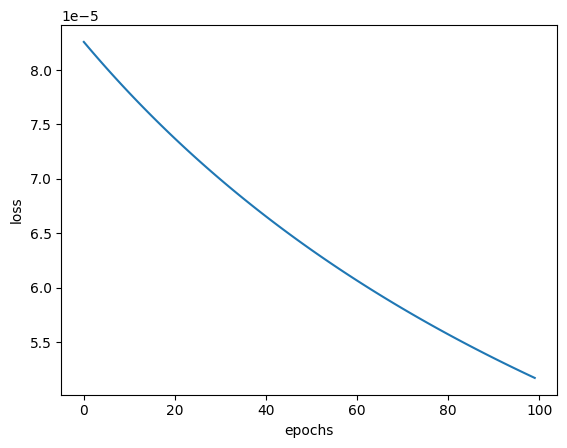

In [46]:
#3 손실함수 뭐 쓸지 정함 (optimize, compile)
# model.optimizer.lr: 0.001
##model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0) #silent
##print("len(model.layers):", len(model.layers)) # 1
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [47]:
#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = (y_pred> 0.5).astype(int) # Z = np.round(Z)
print("y_label:", y_label)

1/1 - 0s - loss: 5.1509e-05 - accuracy: 1.0000 - 79ms/epoch - 79ms/step
test_loss: 5.150860670255497e-05
test_acc: 1.0
1/1 [==============================] - 0s 47ms/step
y_pred: [[5.7212867e-07]
 [7.7823624e-03]
 [7.7823624e-03]
 [9.9078566e-01]]
y_label: [[0]
 [0]
 [0]
 [1]]


9.53*x +9.53*y -14.37 = 0


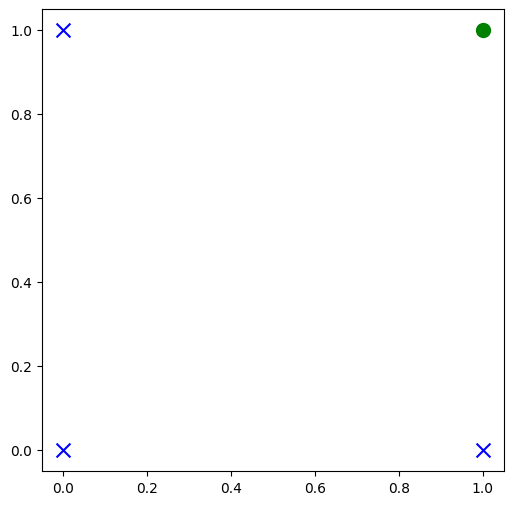

In [48]:
#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0, 1], marker='x', c="blue", s= 100)
plt.scatter(X[label==1, 0], X[label==1, 1], marker='o', c="green",s= 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx', markersize= 10)

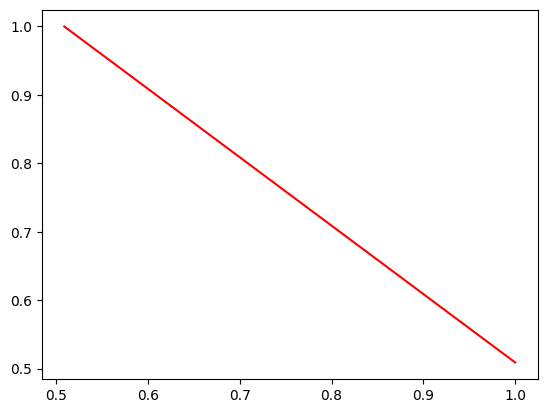

In [49]:
def clippingLineBox(line, box):
    w0, w1, b = line
    xmin, xmax, ymin, ymax = box

    y0 =-(w0*xmin + b)/w1
    y1 =-(w0*xmax + b)/w1

    x0 = -(w1*ymin + b)/w0
    x1 = -(w1*ymax + b)/w0

    xpoints = []
    ypoints = []
    if ymin <= y0 <= ymax:
        xpoints.append(xmin)
        ypoints.append(y0)
    if ymin <= y1 <= ymax:
        xpoints.append(xmax)
        ypoints.append(y1)

    if xmin <= x0 <= xmax:
        xpoints.append(x0)
        ypoints.append(ymin)
    if xmin <= x1 <= xmax:
        xpoints.append(x1)
        ypoints.append(ymax)
    return xpoints, ypoints

# clip the line against a box, and draw
xpoints, ypoints = clippingLineBox(line=(w0, w1, b), box=(0, 1, 0, 1))
plt.plot(xpoints, ypoints, color='red')
plt.show()